In this session, we're going to use Keras to classify MNIST digits using a Dense (Fully Connected) deep neural network. They're not as good as convolutional neural networks for image classification, but it's forward progress, so it's a good exercise to try this out.

In [1]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

import keras.backend as K
from keras.utils import to_categorical
from mnist import MNIST

sess = tf.get_default_session()
K.set_session(sess)

/anaconda3/envs/pythontf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


I have predownloaded the MNIST data (available at [the MNIST website](http://yann.lecun.com/exdb/mnist/)). This is parsed using a library, although I could have just used the inbuilt Keras MNIST dataset (Keras comes with several datasets, more [here](https://keras.io/datasets/)). 

In [2]:
mndata = MNIST('./data/mnist')

In [3]:
images, labels = mndata.load_training()

Here, I normalize the incoming image data to be in between 0 and 1; note, I am not centering it at 0 or anything, but that might be worth a shot.

In [4]:
images = np.array(images) / 255.0
labels = np.array(labels)

In order to take a look at some of the images, I've created a helper function that will plot several images using matplotlib in a row.

In [5]:
def plot_images(images):
    fig = plt.figure(figsize=(len(images), 1))
    for i, image in enumerate(images):
        fig.add_subplot(1, len(images), i+1)
        plt.imshow(image)
    
    plt.show()

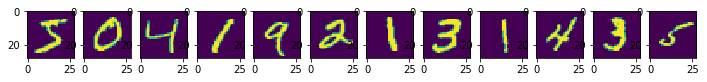

In [6]:
num_images = 12
plot_images(images[:num_images].reshape(num_images,28,28))

In [7]:
labels[:num_images]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

Now, we're going to define the model; here, I've created a model with 4 layers just as an example; 4 was an arbitrary choice, although it does have some significance, since in modern deep learning parlance, in order to be considered "deep", a network is supposed to be 4 layers deep. Kind of shows you how arbitrary the distinction is.

In [21]:
from keras.layers import Dropout

In [22]:
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax'),
])

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

I could have done this up top, but I'm doing this here just for the sake of explaining the training data set up right before training. This is a Keras helper function that one-hot encodes the data. We one-hot encode to make loss calculation easier. In this particular example, we have 10 outputs. We've also used softmax as the activation for the final layer, which means that the entries in the output vector will sum to 1. This can be treated as a probability distribution. We want to maximize the probability of the actual true label and minimize the probabilities in the other columns. How can we define loss in this context (I'm not saying this is how it's done, but let's think about it).

In [10]:
labels = to_categorical(labels)

In [11]:
labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [25]:
model.optimizer.lr = 0.0001

In [27]:
history = model.fit(images, labels,
                    batch_size=32,
                    epochs=2)

Epoch 1/2
60000/60000 [==============================] - 11s 186us/step - loss: 0.0520 - acc: 0.9847
Epoch 2/2
60000/60000 [==============================] - 12s 194us/step - loss: 0.0439 - acc: 0.9870


In [16]:
test_imgs, test_labels = mndata.load_testing()

In [17]:
test_imgs = np.array(test_imgs) / 255
test_labels = np.array(test_labels)

In [18]:
test_labels = to_categorical(test_labels)

In [28]:
model.evaluate(test_imgs, test_labels)

10000/10000 [==============================] - 0s 45us/step


[0.089439970646019079, 0.97840000000000005]

In [29]:
model.metrics_names

['loss', 'acc']